In [7]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import glob
%matplotlib inline

In [9]:
glob.glob('/data/sallen/results/MEOPAR/202007/202007C/*_1m*dia*')

['/data/sallen/results/MEOPAR/202007/202007C/SalishSea_1m_201601_201601_dia_T.nc',
 '/data/sallen/results/MEOPAR/202007/202007C/SalishSea_1m_201602_201602_dia_T.nc']

In [10]:
f=nc.Dataset('/data/sallen/results/MEOPAR/202007/202007C/SalishSea_1m_201602_201602_dia_T.nc')

In [11]:
f.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'BFX_DIAT', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'BFX_PON', 'BFX_bSi'])

In [14]:
f.variables['BFX_DIAT']

<class 'netCDF4._netCDF4.Variable'>
float32 BFX_DIAT(time_counter, y, x)
    long_name: Bottom DIAT Sinking flux
    units: mmol s-1
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s) time_counter: mean
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (1, 898, 398)
filling on

In [12]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=fm.variables['tmask'][:,:,:,:]

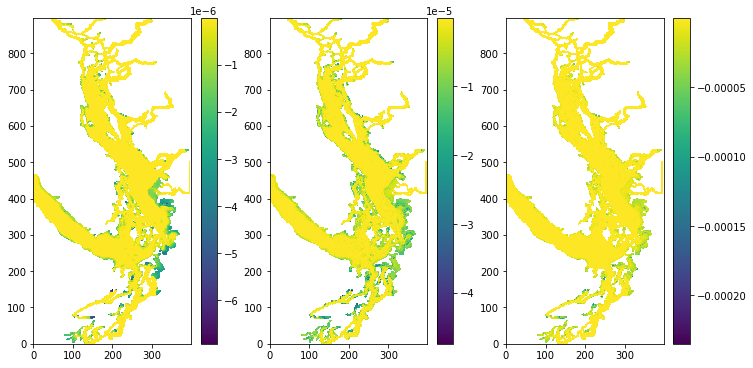

In [16]:
fig,ax=plt.subplots(1,3,figsize=(12,6))
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['BFX_DIAT'][0,:,:]))
fig.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['BFX_PON'][0,:,:]))
fig.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['BFX_bSi'][0,:,:]))
fig.colorbar(m2,ax=ax[2])